In [2]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
titanic_path = "/Users/Stav/github-repos/Stav-Grossfeld-DSI/week-02/5.3-EDA-practice/assets/data/titanic.csv"
titanic = pd.read_csv(titanic_path)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked','Fare']]
sns.set(rc={"figure.figsize": (12, 12)})

In [6]:
titanic.columns = ['survived', 'pclass', 'sex', 'age','embarked','fare']
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
embarked    889 non-null object
fare        891 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 41.8+ KB


In [7]:
pd.isnull(titanic.age).value_counts()

False    714
True     177
Name: age, dtype: int64

In [8]:
titanic.describe()

,survived,pclass,age,fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [9]:
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

In [10]:
titanic.describe()

,survived,pclass,age,fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


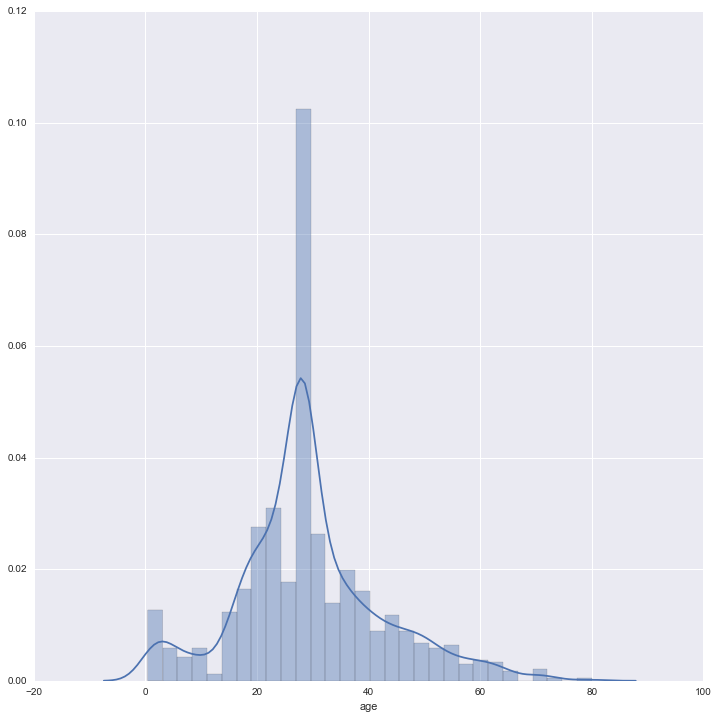

In [11]:
sns.distplot(titanic.age)

In [12]:
pd.isnull(titanic.sex).value_counts()

False    891
Name: sex, dtype: int64

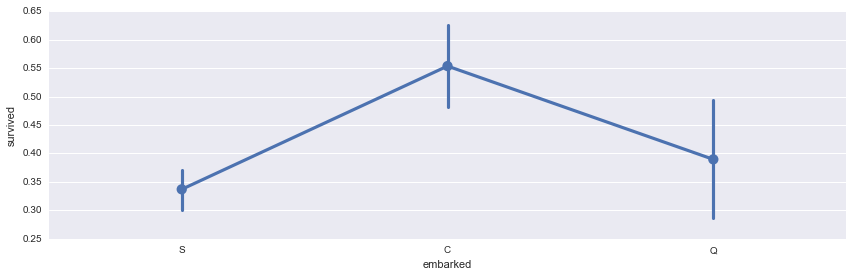

In [13]:
sns.factorplot('embarked','survived', data=titanic,size=4,aspect=3)

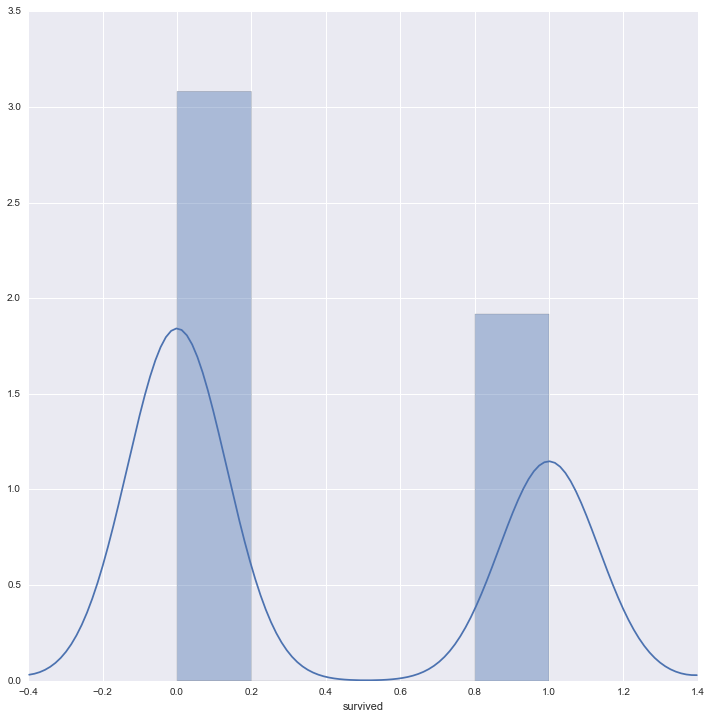

In [14]:
sns.distplot(titanic.survived)

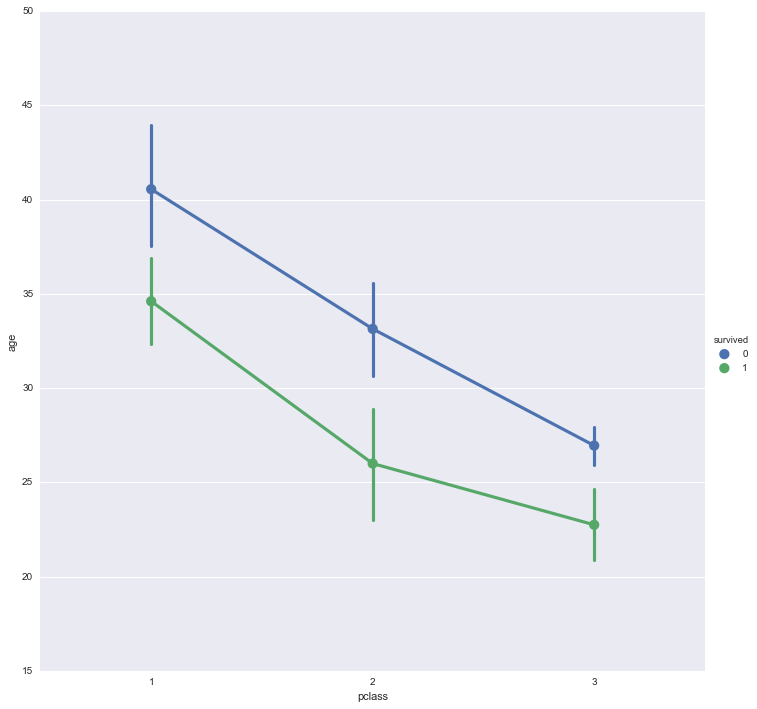

In [15]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.factorplot('pclass', "age", data=titanic, hue='survived', fit_reg=False, size = 10)

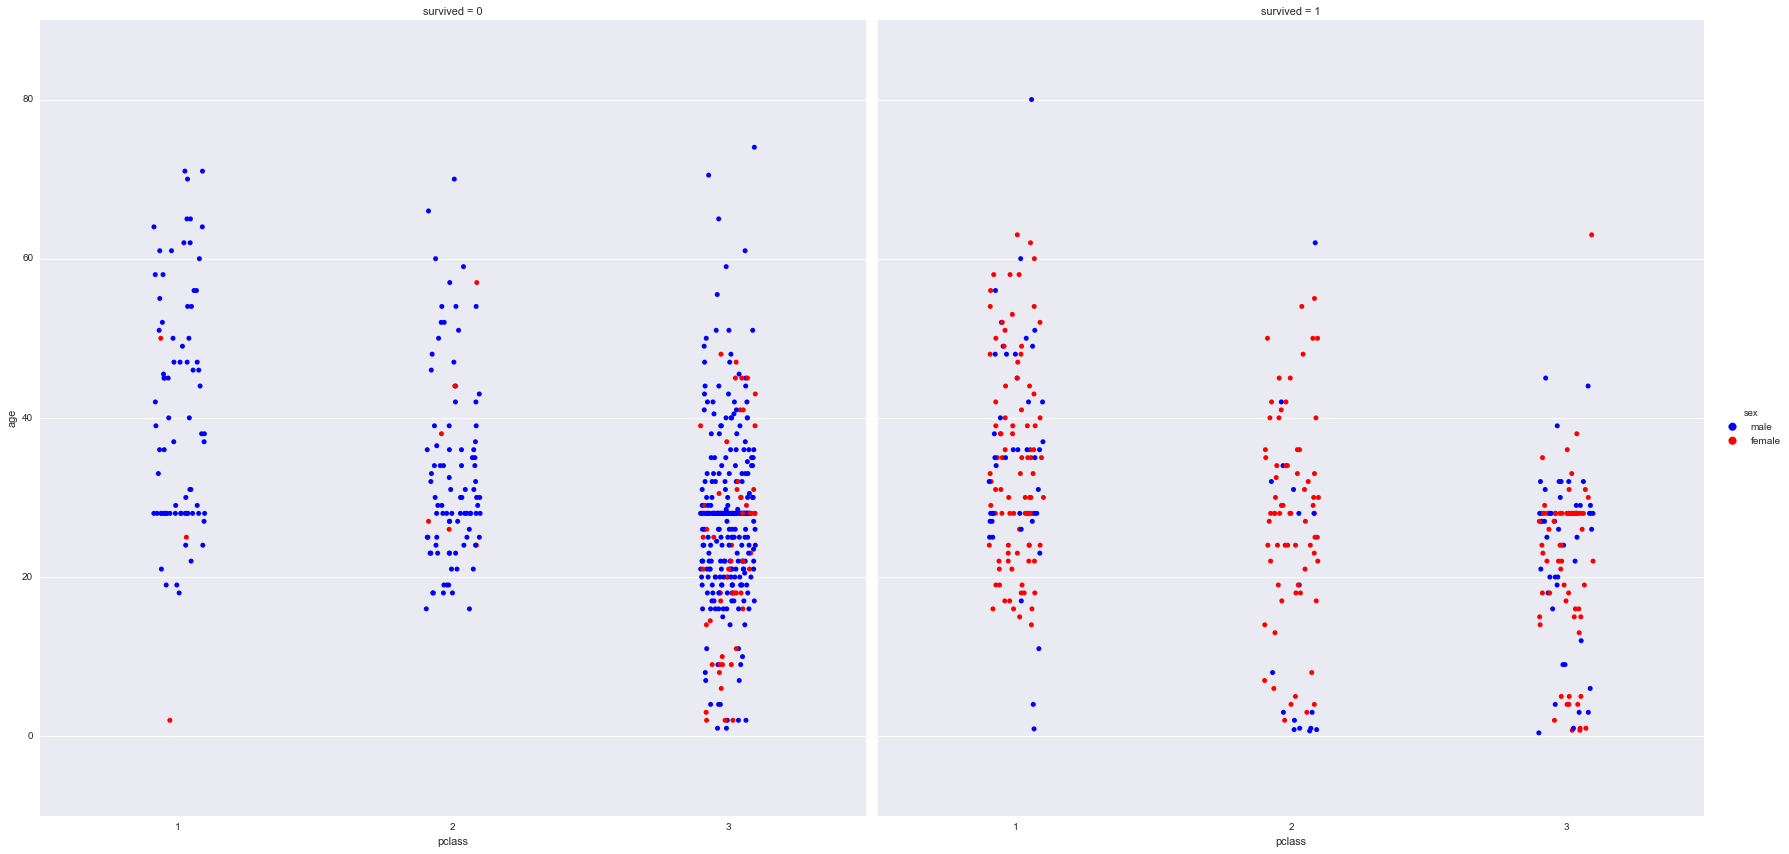

In [16]:
#sns.palplot(sns.color_palette("RdBu", n_colors=7))

#sns.stripplot('survived','age', hue = 'sex', data = titanic, )

sns.set(rc={"figure.figsize": (12, 12)})
g = sns.factorplot(data=titanic,
                   x='pclass',
                   y='age',
                   col='survived',
                   hue='sex',
                   palette={'male':'blue','female':'red'},
                   kind='strip',
                   jitter=True, size = 12
                   )

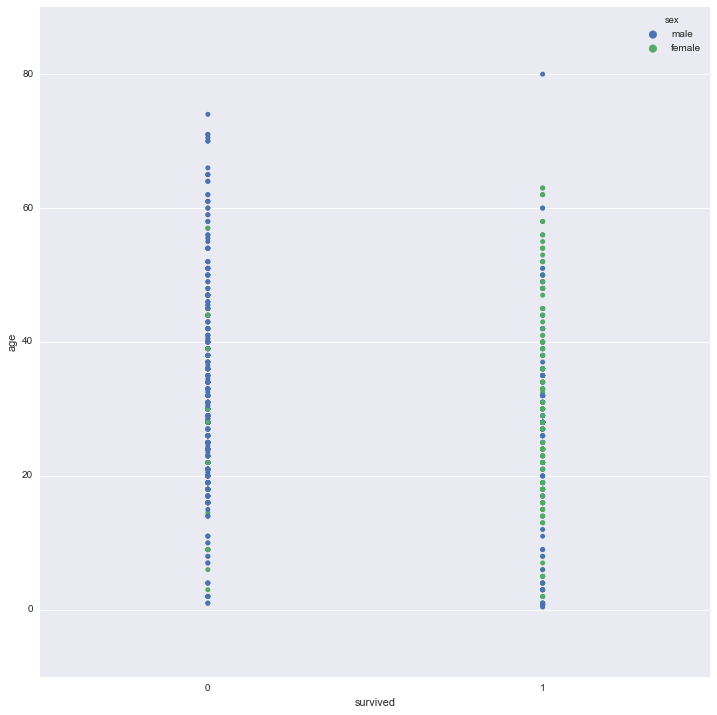

In [17]:
sns.stripplot('survived','age', hue = 'sex', data = titanic)

male      577
female    314
Name: sex, dtype: int64
survived  sex   
0         male      468
          female     81
1         female    233
          male      109
dtype: int64


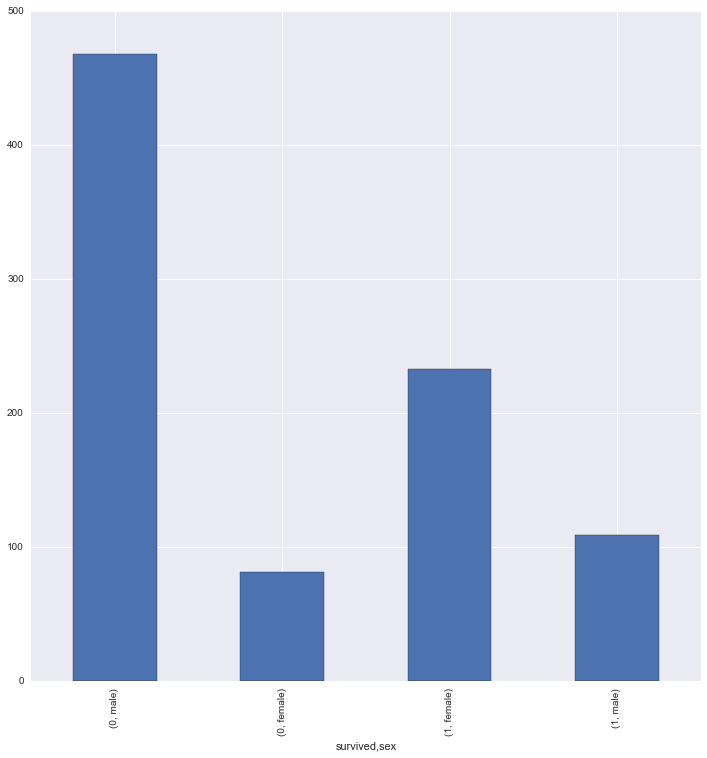

In [18]:
titanic.groupby('survived').sex.value_counts().plot(kind = 'bar')

print titanic.sex.value_counts()
print titanic.groupby('survived').sex.value_counts()

In [19]:
sns.distplot(p1.Age, 20)
sns.distplot(p2.Age, 20)
sns.distplot(p3.Age, 20)

NameError: name 'p1' is not defined

In [ ]:
sns.factorplot(x='Age', y= 'Age', hue = "Pclass")

In [ ]:
fig = sns.FacetGrid(titanic, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

In [ ]:
sns.pairplot(titanic, hue = 'survived')

/Users/Stav/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1138: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 12
  strip_data = group_data[hue_mask]


IndexError: index 6 is out of bounds for axis 0 with size 6

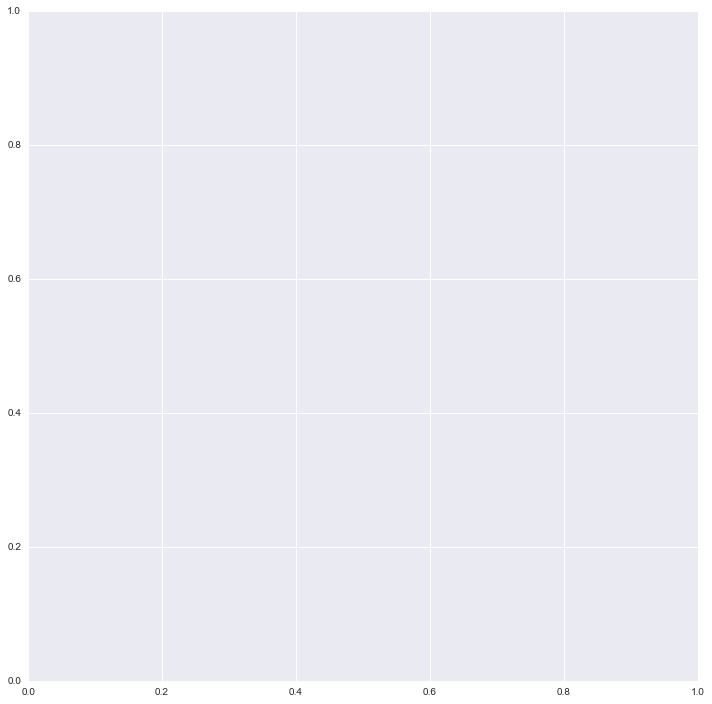

In [30]:
sns.stripplot(titanic.groupby(['pclass','sex']).survived)